In [51]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split

In [44]:
X_raw , y_raw = fetch_openml('mnist_784', version=1, return_X_y=True)

In [42]:
print(X_raw.shape)
print(y_raw.shape)

(70000, 784)
(70000,)


In [45]:
#Dataframes converted into numpy arrays
X_raw_np = X_raw.to_numpy()
y_raw_np = y_raw.to_numpy()

Exploring the data:

In [46]:
#Thought it'd be cool to see the images as a matrix

np.set_printoptions(linewidth=2000)
print(X_raw_np[0].reshape(28, 28))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253. 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.]

Label is 5


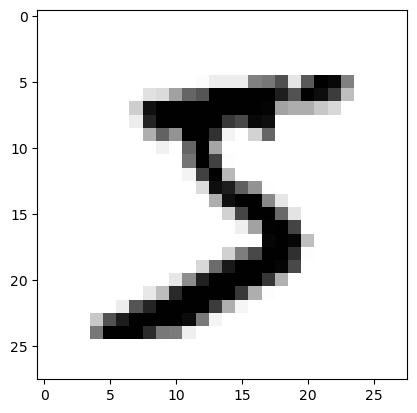

In [50]:
index=0

plt.imshow(X_raw_np[index].reshape(28,28), cmap=cm.binary)
print("Label is", y_raw_np[index])

End of exploration.

In [54]:
#Data split into 60% training, 20% validation & 20% test

X_train, X_temp, y_train, y_temp = train_test_split(X_raw_np, y_raw_np, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [60]:
#Checking dimensions

print("X_train =",X_train.shape)
print("y_train =",y_train.shape)
print("X_val =", X_val.shape)
print("y_val =", y_val.shape)
print("X_test =", X_test.shape)
print("y_test =", y_test.shape)

X_train = (42000, 784)
y_train = (42000,)
X_val = (14000, 784)
y_val = (14000,)
X_test = (14000, 784)
y_test = (14000,)


In [249]:
#changing values to between 0-1 
X_train, X_val, X_test = np.array(X_train/255), np.array(X_val/255), np.array(X_test/255)


# Changing y data into binary matricies such that each row is a vector with 0s and 1 which indicates the label.
# this is done so that a MSE error can be calulated while using sigmound activation function for the output layer.


#y_train into binary matrix
y_train_binary = np.zeros((42000,10))

j = 0
for i in range(0, len(y_train)):
    


    if int(y_train[i]) == 0:
        
        y_train_binary[j] +=  np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 1:
        
        y_train_binary[j] +=  np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 2:
        
        y_train_binary[j] +=  np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1
    elif int(y_train[i]) == 3:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 4:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 5:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) 
        j += 1
    elif int(y_train[i]) == 6:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 7:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 8:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) 
        j += 1

    elif int(y_train[i]) == 9:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 
        j += 1
    


        
#y_val into binary matrix
y_val_binary = np.zeros((14000,10))

j = 0
for i in range(0, len(y_val)):
    


    if int(y_val[i]) == 0:
        
        y_val_binary[j] +=  np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 1:
        
        y_val_binary[j] +=  np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 2:
        
        y_val_binary[j] +=  np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1
    elif int(y_val[i]) == 3:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 4:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 5:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) 
        j += 1
    elif int(y_val[i]) == 6:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 7:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 8:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) 
        j += 1

    elif int(y_val[i]) == 9:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 
        j += 1



#y_test into binary matrix
y_test_binary = np.zeros((14000,10))

j = 0
for i in range(0, len(y_test)):
    


    if int(y_test[i]) == 0:
        
        y_test_binary[j] +=  np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 1:
        
        y_test_binary[j] +=  np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 2:
        
        y_test_binary[j] +=  np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1
    elif int(y_test[i]) == 3:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 4:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 5:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) 
        j += 1
    elif int(y_test[i]) == 6:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 7:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 8:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) 
        j += 1

    elif int(y_test[i]) == 9:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 
        j += 1



#### **NN begins**

##### In this implementation everything is manually coded.

##### NN specification:

L = 4, L1 has 784 neurons, 2 hidden layers have 16 neurons each and the output layer has 10, one for each digit.


W2 has dimensions 16 x 784 <br>
W3 has dimensions 16 x 16 <br>
W4 has dimensions 10 x 16 <br>

b2-3 has dimensions 16 x 1 <br>
b4 has dimensions 10 x 1 <br>


##### Steps:
1. Manually generate all weight matricies and biases then initalize randomly 

***

2. Split data into mini batches
3. Feedforward a single training example from a given batch
4. Calulate cost 
5. Backprop and calulate the gradient

***

6. Repeat steps 3-5 for all images in first batch

***

7. Average the gradient of the cost for all images in the first batch
8. apply gradient decent step to update the weights

***

9. Repeat 3-8 for all minibatches

***
10. shuffle data
11. Repeat 2-9 for a given number of 'epochs' 



In [248]:
#Creating and initializing matricies & biases randomly to values between -5 - 5

W2 = np.random.uniform(low = -5,high= 5,size =(16, 784))
W3 = np.random.uniform(low = -5,high= 5,size =(16, 16))
W4 = np.random.uniform(low = -5,high= 5,size =(10, 16))

b2 = np.random.uniform(low = -5,high= 5,size =(16, 1))
b3 = np.random.uniform(low = -5,high= 5,size =(16, 1))
b4 = np.random.uniform(low = -5,high= 5,size =(10, 1))


In [250]:
# Function for shuffling and creating mini batches by turning X and y into tensors
from sklearn.utils import shuffle


def create_mini_batch(X_input, y_input, mini_batch_size):

    X_shuffled, y_shuffled = shuffle(X_input, y_input)

    reshaped_dim = int(len(X_shuffled)/mini_batch_size)

    X_minibatches_tensor = X_shuffled.reshape(mini_batch_size, reshaped_dim, X_shuffled.shape[1] )

    y_minibatches_tensor = y_shuffled.reshape(mini_batch_size, reshaped_dim, y_shuffled.shape[1])


    return X_minibatches_tensor, y_minibatches_tensor


# The above function outputs a X tensor such that each matrix being a mini batch with each row being an image
# it outputs y a 3 tendor with the input being the y binary matricies. the matricies of the tensor are a given minibatch
#  and the rows are the labels of each image. 


In [251]:
# Activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [ ]:
# Feedsforward one layer and outputs Z and activations of the next layer. 
def feedforward(a, W, b):


    return Z_l, A_l 